In [1]:
import os
import pandas as pd
import numpy as np
from io import StringIO
from tqdm import tqdm
from collections import defaultdict
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import geopandas as gpd

In [5]:
#  统计用户停留点的数量
def caculate_adj_staypoint(data):
    transition_counts = (
        data.groupby(['ID'])
        .size()
        .reset_index(name='visit_count')
    )
    return transition_counts

In [6]:
data = pd.read_csv(r"H:\结果数据\停留点\福州\4月\Timing_4_1.csv")
transition_counts = caculate_adj_staypoint(data)
transition_counts

,ID,visit_count
0,00001b94-cbad-357d-a3f7-93840bd9fd6a,2
1,00002edc-5b31-42d7-913b-4c06358ef30a,3
2,00003585~8kc4f`aj ;5m`yc7<5idbi677b,2
3,000045bd-9334-43c9-a2af-dcf62c170d72,4
4,00005d00-23e1-4d38-ae2d-f9b3a9143f3f,2
...,...,...
1206336,gfjndo?5~kn64f46e bf87yba8?;24656fa,3
1206337,gfk34ok>~hm`efh81 8fk2yll9emc4hgd14,3
1206338,gfk379=?~3ogcf49b 8ciay360>9f0236be,3
1206339,gfke7494~8h74f69f bfe0y1703o:161175,2


<Axes: xlabel='visit_count'>

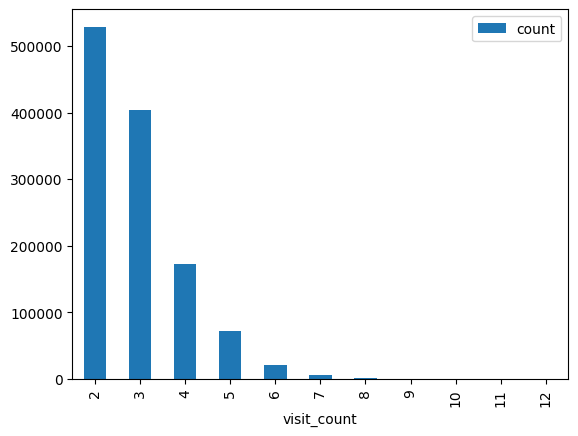

In [7]:
vist_count = (
        transition_counts.groupby(['visit_count'])
        .size()
        .reset_index(name='count')
    )
vist_count.plot(x='visit_count',y='count',kind='bar') # 停留的数量在4个以内，以2个为最多